In [30]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#サンプルデータ取得
df1 = pd.read_excel('methanol.ods',engine="odf")
df1.head(18)

,#oftry,Si/Al2,Ion exchange rate(%),TON for CH3OH + HCHO(molMeOH+HCHO/molCu),CH3OH + HCHO selectivity(%)
0,0,5.2,31.2,0.0,100
1,0,5.2,34.1,0.0,100
2,0,5.2,44.0,0.0,100
3,0,5.2,67.0,0.0,100
4,0,7.2,34.2,0.1,29
5,0,7.2,39.9,0.1,27
6,0,7.2,50.4,0.1,28
7,0,7.2,71.3,0.0,100
8,0,7.2,81.5,0.0,100
9,0,10.0,39.8,1.2,100


In [31]:
#oftry=0のみ可視化
df2 = df1[df1['#oftry']==0]
df2 = df2.rename(columns={'Ion exchange rate(%)':'Cu IER',
                   'TON for CH3OH + HCHO(molMeOH+HCHO/molCu)':'TON',
                   'CH3OH + HCHO selectivity(%)':'selectivity'})
df2

,#oftry,Si/Al2,Cu IER,TON,selectivity
0,0,5.2,31.2,0.0,100
1,0,5.2,34.1,0.0,100
2,0,5.2,44.0,0.0,100
3,0,5.2,67.0,0.0,100
4,0,7.2,34.2,0.1,29
5,0,7.2,39.9,0.1,27
6,0,7.2,50.4,0.1,28
7,0,7.2,71.3,0.0,100
8,0,7.2,81.5,0.0,100
9,0,10.0,39.8,1.2,100


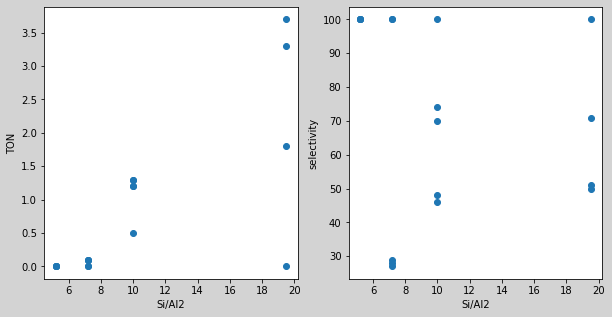

In [32]:
#Si/AlとTON、選択性
#figure生成
fig = plt.figure(figsize=(10,5),facecolor="lightgray")

#axes生成
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ラベル付
ax1.set_xlabel('Si/Al2')
ax1.set_ylabel('TON')
ax2.set_xlabel('Si/Al2')
ax2.set_ylabel('selectivity')

#plot
ax1.scatter(df2['Si/Al2'],df2['TON'])
ax2.scatter(df2['Si/Al2'],df2['selectivity'])

#adjustment
fig.subplots_adjust(wspace=0.2,hspace=0)

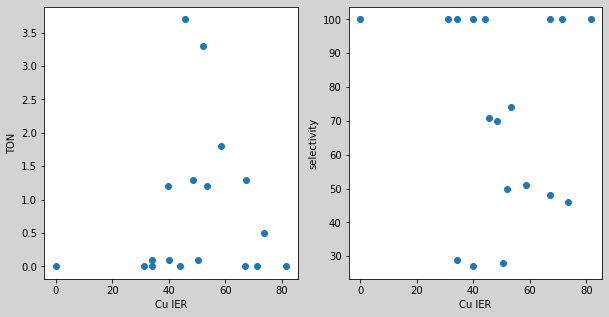

In [33]:
#CuIERとTON、選択性
#figure,axesを生成
fig, axes = plt.subplots(1,2,figsize=(10,5),facecolor="lightgray")
#plot
for i in range(2):
    axes[i].scatter(df2["Cu IER"],df2.iloc[:,i+3])
    axes[i].set_xlabel("Cu IER")
    axes[i].set_ylabel(df2.columns[i+3])

#adjustment
fig.subplots_adjust(wspace=0.2,hspace=0)

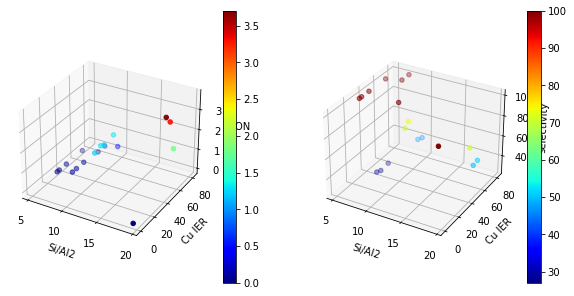

In [37]:
#各パラメータの三次元プロット
#figureを生成
fig, axes = plt.subplots(1,2,figsize=(10,5),
                         subplot_kw=dict(projection="3d"))

#plot
for i in range(2):
    axes[i].set_xlabel("Si/Al2")
    axes[i].set_ylabel("Cu IER")
    axes[i].set_zlabel(df2.columns[i+3])
    p = axes[i].scatter(df2["Si/Al2"], df2["Cu IER"], df2.iloc[:,i+3],
                    c=df2.iloc[:,i+3],cmap='jet')
    fig.colorbar(p,ax=axes[i])

#adjustment


